In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [5]:
titanic_df = sns.load_dataset('titanic')

In [6]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


array([[<AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'pclass'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sibsp'}>],
       [<AxesSubplot:title={'center':'parch'}>,
        <AxesSubplot:title={'center':'fare'}>]], dtype=object)

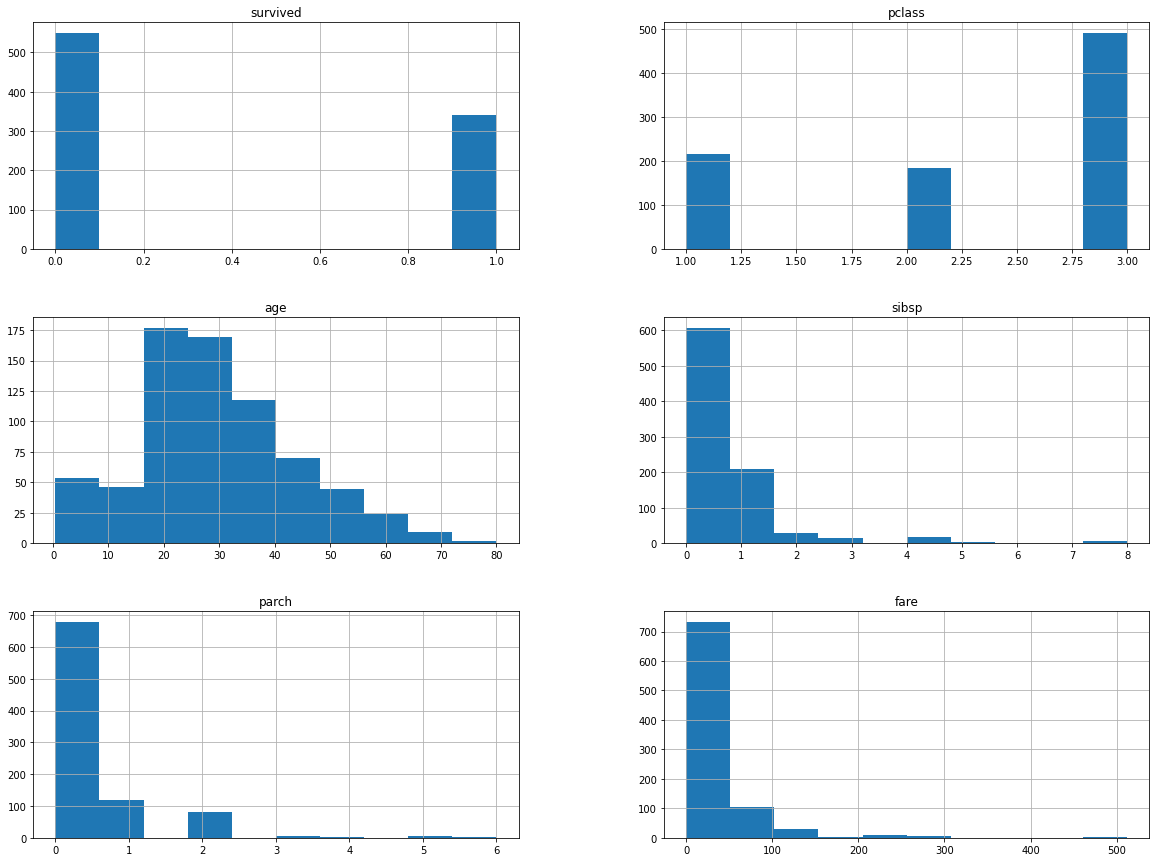

In [6]:
titanic_df.hist(figsize=(20,15))

<AxesSubplot:>

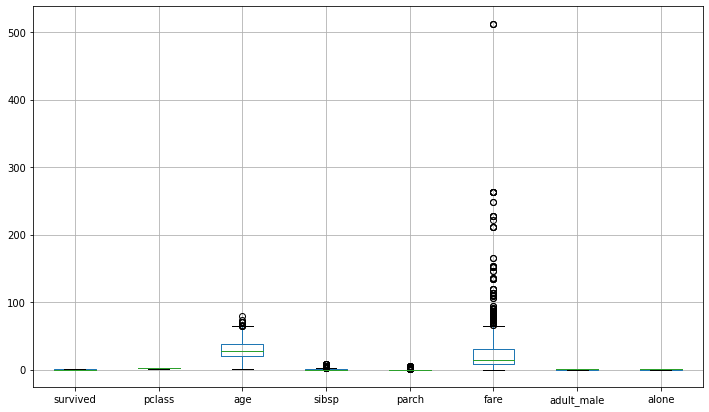

In [7]:
titanic_df.boxplot(figsize=(12,7))

array([<AxesSubplot:title={'center':'age'}, xlabel='[pclass, survived]'>,
       <AxesSubplot:title={'center':'fare'}, xlabel='[pclass, survived]'>],
      dtype=object)

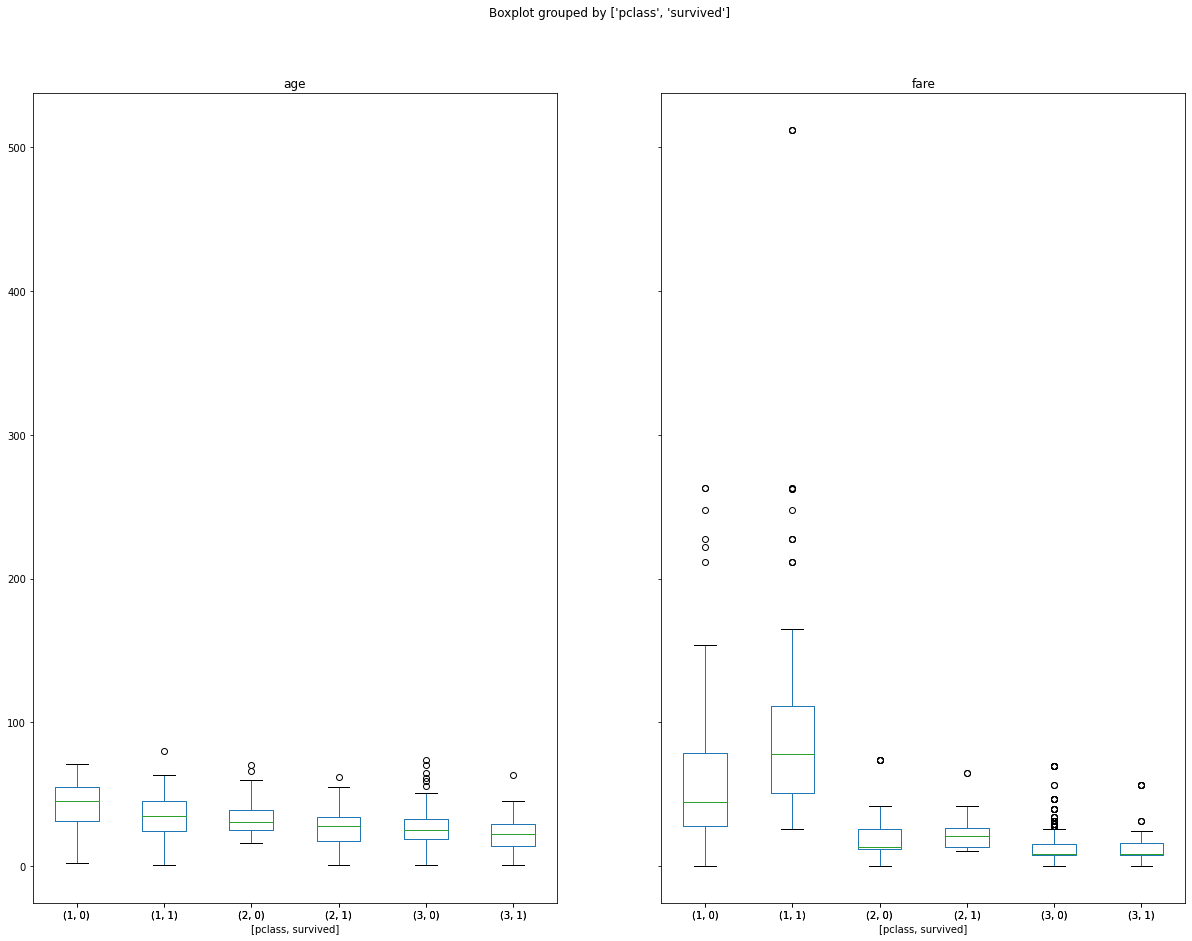

In [8]:
titanic_df.boxplot(by=['pclass', 'survived'], column=['age', 'fare'], figsize=(20,15), grid=False)

<AxesSubplot:title={'center':'age'}, xlabel='[survived, sex]'>

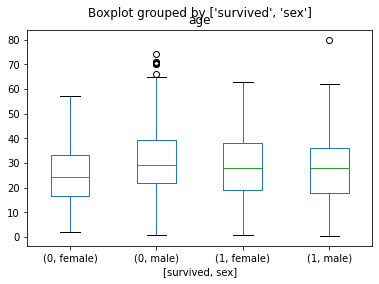

In [9]:
titanic_df.boxplot(by=['survived', 'sex'], column=['age'], grid=False)

<AxesSubplot:>

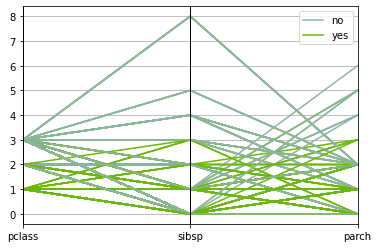

In [10]:
pd.plotting.parallel_coordinates(titanic_df,'alive', cols=['pclass', 'sibsp', 'parch'])

<AxesSubplot:xlabel='pclass', ylabel='survived'>

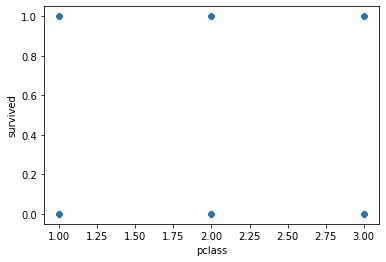

In [11]:
titanic_df.plot.scatter('pclass', 'survived')

In [12]:
titanic_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

array([[<AxesSubplot:xlabel='survived', ylabel='survived'>,
        <AxesSubplot:xlabel='pclass', ylabel='survived'>,
        <AxesSubplot:xlabel='age', ylabel='survived'>,
        <AxesSubplot:xlabel='sibsp', ylabel='survived'>,
        <AxesSubplot:xlabel='parch', ylabel='survived'>,
        <AxesSubplot:xlabel='fare', ylabel='survived'>],
       [<AxesSubplot:xlabel='survived', ylabel='pclass'>,
        <AxesSubplot:xlabel='pclass', ylabel='pclass'>,
        <AxesSubplot:xlabel='age', ylabel='pclass'>,
        <AxesSubplot:xlabel='sibsp', ylabel='pclass'>,
        <AxesSubplot:xlabel='parch', ylabel='pclass'>,
        <AxesSubplot:xlabel='fare', ylabel='pclass'>],
       [<AxesSubplot:xlabel='survived', ylabel='age'>,
        <AxesSubplot:xlabel='pclass', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='sibsp', ylabel='age'>,
        <AxesSubplot:xlabel='parch', ylabel='age'>,
        <AxesSubplot:xlabel='fare', ylabel='age'>],
       [<A

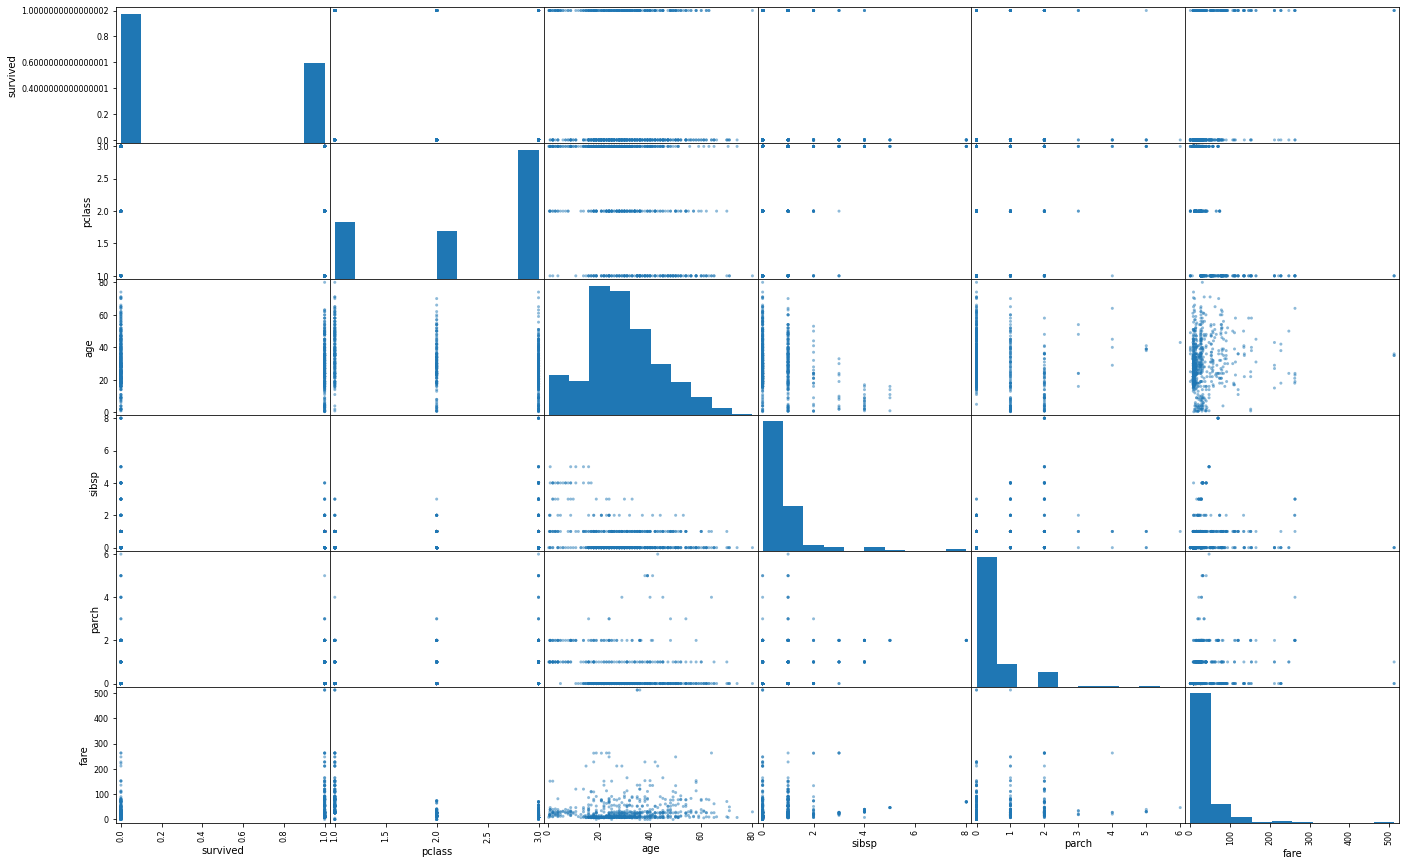

In [13]:
pd.plotting.scatter_matrix(titanic_df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']], figsize=(23,15))

In [14]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
pairs = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']

<AxesSubplot:xlabel='age', ylabel='fare'>

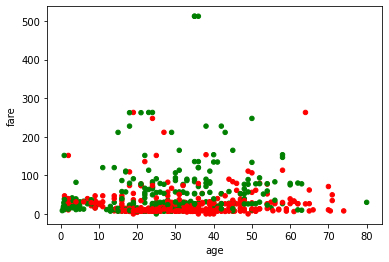

In [46]:
titanic_df.plot.scatter('age', 'fare',c='survived', colormap=mpl.colors.ListedColormap(['red', 'green']), colorbar=False)

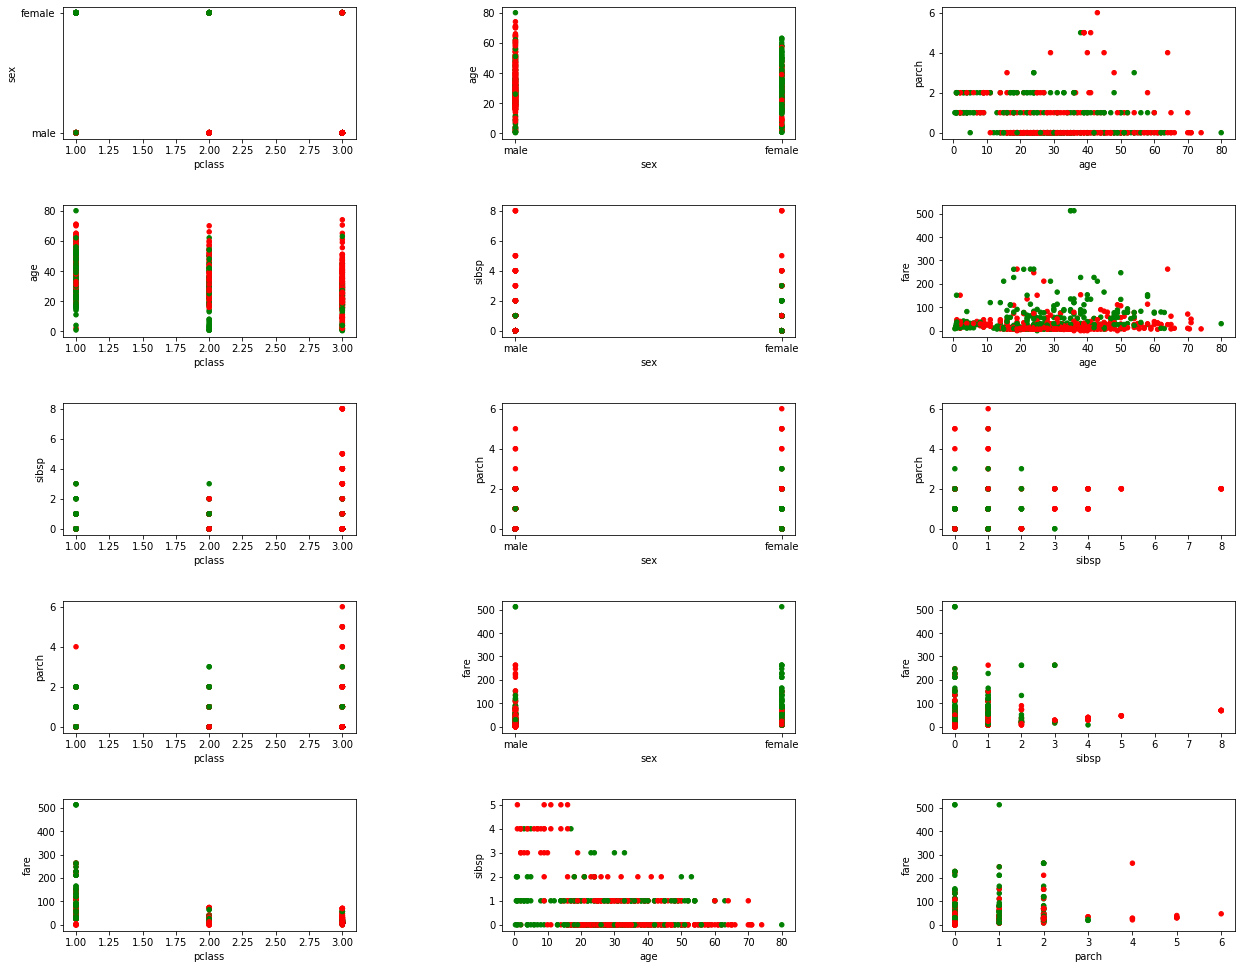

In [47]:
fig, axes = plt.subplots(5, 3, figsize=(21, 17))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
clrs = mpl.colors.ListedColormap(['red', 'green'])
from itertools import combinations
for i,(x,y) in enumerate(combinations(pairs,2)):
    titanic_df.plot.scatter(x, y,c='survived', colormap=clrs, ax=axes[i%5][i//5], colorbar=False)

<AxesSubplot:xlabel='age', ylabel='fare'>

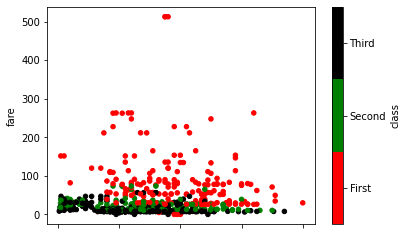

In [16]:
clrs = mpl.colors.ListedColormap(['red', 'green', 'black'])
titanic_df.plot.scatter('age', 'fare', colormap=clrs, c='class')

alive
no     AxesSubplot(0.125,0.125;0.62x0.755)
yes    AxesSubplot(0.125,0.125;0.62x0.755)
dtype: object

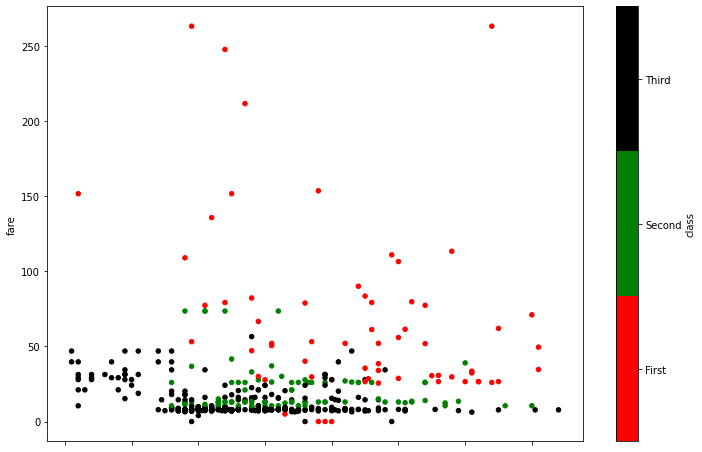

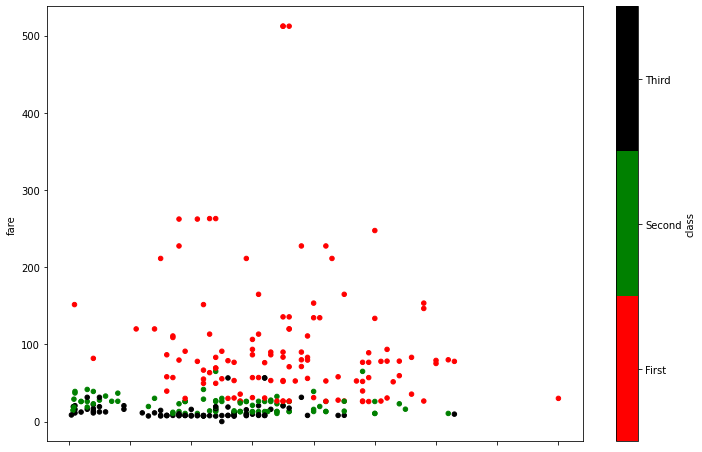

In [23]:
clrs = mpl.colors.ListedColormap(['red', 'green', 'black'])
titanic_df.groupby('alive').plot.scatter('age', 'fare', colormap=clrs, c='class', figsize=(12, 8))